In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
%matplotlib inline

In [93]:
emp=pd.read_csv("emp_data.csv")

In [94]:
emp

,Salary_hike,Churn_out_rate
0,1580,92
1,1600,85
2,1610,80
3,1640,75
4,1660,72
5,1690,70
6,1706,68
7,1730,65
8,1800,62
9,1870,60


In [95]:
emp.columns

Index(['Salary_hike', 'Churn_out_rate'], dtype='object')

In [96]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
Salary_hike       10 non-null int64
Churn_out_rate    10 non-null int64
dtypes: int64(2)
memory usage: 240.0 bytes


In [97]:
emp.describe()

,Salary_hike,Churn_out_rate
count,10.000000,10.000000
mean,1688.600000,72.900000
std,92.096809,10.257247
min,1580.000000,60.000000
25%,1617.500000,65.750000
50%,1675.000000,71.000000
75%,1724.000000,78.750000
max,1870.000000,92.000000


# EDA

C:\Users\ayukk22\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


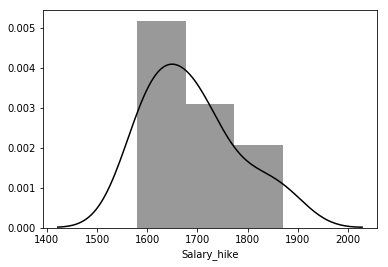

In [98]:
sns.distplot(emp['Salary_hike'],color='black')

C:\Users\ayukk22\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


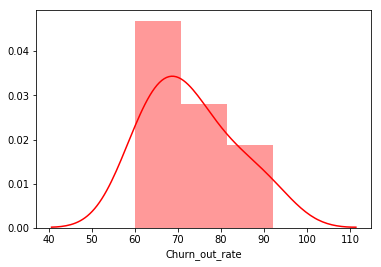

In [99]:
sns.distplot(emp['Churn_out_rate'],color='red')

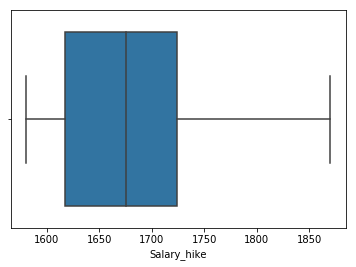

In [100]:
sns.boxplot(emp['Salary_hike'])

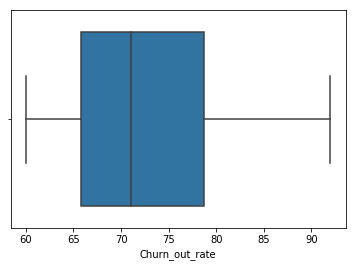

In [101]:
sns.boxplot(emp['Churn_out_rate'])

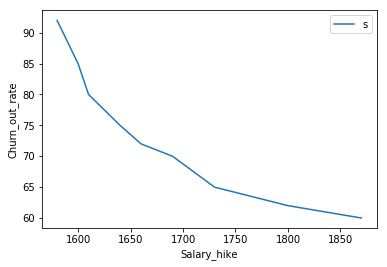

In [102]:
plt.plot(emp['Salary_hike'],emp['Churn_out_rate'])
plt.xlabel('Salary_hike')
plt.ylabel('Churn_out_rate')
plt.legend('salary_rate')
plt.show()

In [103]:
emp.corr()

,Salary_hike,Churn_out_rate
Salary_hike,1.000000,-0.911722
Churn_out_rate,-0.911722,1.000000


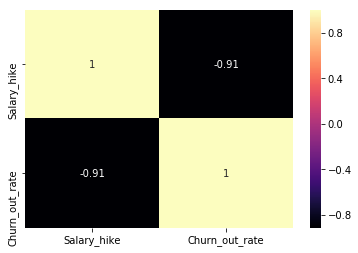

In [104]:
sns.heatmap(emp.corr(),cmap='magma',annot=True)

In [105]:
emp['Churn_out_rate'].corr(emp['Salary_hike'])  #correlation value between X and Y

-0.9117216186909112

In [106]:
np.corrcoef(emp['Churn_out_rate'],emp['Salary_hike'])

array([[ 1.        , -0.91172162],
       [-0.91172162,  1.        ]])

# LINEAR MODEL

In [112]:
import statsmodels.formula.api as smf

In [113]:
model=smf.ols('Churn_out_rate~Salary_hike',data=emp).fit()

In [114]:
model.params

Intercept      244.364911
Salary_hike     -0.101543
dtype: float64

In [115]:
model.summary()

C:\Users\ayukk22\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Churn_out_rate   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     39.40
Date:                Fri, 29 May 2020   Prob (F-statistic):           0.000239
Time:                        21:33:41   Log-Likelihood:                -28.046
No. Observations:                  10   AIC:                             60.09
Df Residuals:                       8   BIC:                             60.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     244.3649     27.352      8.934      0.000     181.291     307.439
Salary_hike    -0.1015      0.016     -6.277      0.000      -0.139      -0.064
==============================================================================
Omnibus:                        2.201   Durbin-Watson:                   0.562
Prob(Omnibus):                  0.333   Jarque-Bera (JB):                1.408
Skew:                           0.851   Prob(JB):                        0.495
Kurtosis:                       2.304   Cond. No.                     3.27e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [116]:
model.conf_int(0.05)

,0,1
Intercept,181.291232,307.438591
Salary_hike,-0.138845,-0.064240


In [117]:
prediction=model.predict(emp)

In [118]:
prediction

0    83.927531
1    81.896678
2    80.881252
3    77.834973
4    75.804120
5    72.757840
6    71.133158
7    68.696134
8    61.588149
9    54.480164
dtype: float64

Text(0,0.5,'Churn_out_rate')

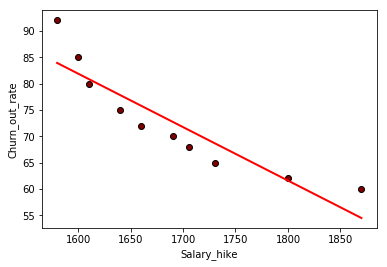

In [119]:
plt.scatter(x='Salary_hike',y='Churn_out_rate',data=emp,c='maroon',edgecolors='black')
plt.plot(emp['Salary_hike'],prediction,color='red',linewidth=2)
plt.xlabel('Salary_hike')
plt.ylabel('Churn_out_rate')

In [121]:
prediction.corr(emp['Churn_out_rate'])


0.9117216186909112

# LOGRITHMIC TRANSFORMATION

In [123]:
model2 = smf.ols('Churn_out_rate~np.log(Salary_hike)',data=emp).fit()
type(model2)


statsmodels.regression.linear_model.RegressionResultsWrapper

In [124]:
model2.params

Intercept              1381.456193
np.log(Salary_hike)    -176.109735
dtype: float64

In [125]:
model2.summary()

C:\Users\ayukk22\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Churn_out_rate   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     44.85
Date:                Fri, 29 May 2020   Prob (F-statistic):           0.000153
Time:                        21:46:04   Log-Likelihood:                -27.502
No. Observations:                  10   AIC:                             59.00
Df Residuals:                       8   BIC:                             59.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1381.4562    195.402      7.070      0.000     930.858    1832.054
np.log(Salary_hike)  -176.1097     26.297     -6.697      0.000    -236.751    -115.468
==============================================================================
Omnibus:                        2.213   Durbin-Watson:                   0.571
Prob(Omnibus):                  0.331   Jarque-Bera (JB):                1.418
Skew:                           0.853   Prob(JB):                        0.492
Kurtosis:                       2.298   Cond. No.                     1.10e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [126]:
model2.conf_int(0.01)  # 99% confidence level

,0,1
Intercept,725.806856,2037.105529
np.log(Salary_hike),-264.347078,-87.872392


In [129]:
prediction2 = model2.predict(emp)

In [130]:
prediction2.corr(emp['Churn_out_rate'])
prediction2

0    84.376270
1    82.161024
2    81.063764
3    77.812415
4    75.677725
5    72.523437
6    70.863969
7    68.403723
8    61.418285
9    54.699388
dtype: float64

Text(0,0.5,'Churn_out_rate')

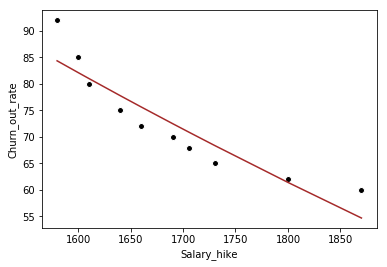

In [131]:
plt.scatter(x=emp['Salary_hike'],y=emp['Churn_out_rate'],color='black',edgecolors='white')
plt.plot(emp['Salary_hike'],prediction2,color='brown')
plt.xlabel('Salary_hike')
plt.ylabel('Churn_out_rate')

In [137]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
mae = metrics.mean_absolute_error(emp['Churn_out_rate'], prediction)
mae

3.4214953809715865

In [138]:
mse = metrics.mean_squared_error(emp['Churn_out_rate'], prediction)
mse

15.980233807200758

In [139]:
rmse = np.sqrt(metrics.mean_squared_error(emp['Churn_out_rate'], prediction))
rmse

3.997528462337793